In [1]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”

# Section E. Multiclass Perceptron
## Question 6 [ Multiclass Perceptron ]
### I. Loading the data

In [2]:
train = read.csv("assignment1_datasets/Task1D_train.csv")
test = read.csv("assignment1_datasets/Task1D_test.csv")

train_features = as.matrix(train[,-ncol(train)])
train_features = scale(train_features)
train_target = as.matrix(train[,ncol(train)])
test_features = as.matrix(test[,-ncol(test)])
test_features = scale(test_features)
test_target = as.matrix(test[,ncol(test)])


In [3]:
train

x1,x2,x3,x4,y
5.1,3.5,1.4,0.2,C1
4.7,3.2,1.3,0.2,C1
5.0,3.6,1.4,0.2,C1
4.6,3.4,1.4,0.3,C1
4.4,2.9,1.4,0.2,C1
5.4,3.7,1.5,0.2,C1
4.8,3.0,1.4,0.1,C1
5.8,4.0,1.2,0.2,C1
5.4,3.9,1.3,0.4,C1
5.7,3.8,1.7,0.3,C1


This is an auxiliary function that calculatees the error, given a theta value. The error is the amount by which the function predicted the value of hypothesis wrong, from the correct class.

In [3]:
calculate_error <- function(x,y,theta){
    
    h = x %*% theta
    prediction = max.col(h)
    error = 0
    incorrect = which(as.matrix(prediction) != as.matrix(y))
    m = length(incorrect)
    for (i in incorrect){
        s = +1
        if( (x[i,]%*%theta[,y[i]])  < 0){
            s = -1
        }
        error = error + ((x[i,]%*%theta[,y[i]] ) * s)
        
    }
    return(error)
}

### II
Implementing perceptron that takes the training and testing data, learning rate eta and max number of updates as parameters to return the error and theta.

In [4]:
set.seed(1)
multi_perceptron <- function(train_x,train_y,test_x,test_y,eta,tau){
    
    train_x = cbind(1,train_x)
    test_x = cbind(1,test_x)
    
    num_classes = nrow(unique(train_target))
    num_features = ncol(train_x)
    
    theta = matrix(runif(num_classes*num_features),nrow = num_features,ncol = num_classes )
    

    # we assign numeric labels to the classes for ease of use
    c1 = which(train_y == "C1")
    train_y[c1] = 1
    c2 = which(train_y == "C2")
    train_y[c2] = 2
    c3 = which(train_y == "C3")
    train_y[c3] = 3
    
    c1 = which(test_y == "C1")
    test_y[c1] = 1
    c2 = which(test_y == "C2")
    test_y[c2] = 2
    c3 = which(test_y == "C3")
    test_y[c3] = 3
    error = c()
    idx = 1
    cnt = 1
    
# the while loop works till the maximum number of updates have been made

    while (cnt<= tau){

# we update theta after considering each observation
        for (i in 1:nrow(train_x)){

# we frame the hypothesis and fit the data to the hypothesis
            h = train_x[i,] %*% theta            
            prediction = max.col(h)
            actual = as.numeric(train_y[i])
            
#incase there is any conflict with respect to that observation, we update the theta values
            if(prediction!=actual){

                theta[,prediction] = theta[,prediction] - (eta*t(train_x[i,]))
                theta[,actual] = theta[,actual] + (eta*t(train_x[i,]))

            }
# we calculate the error after every 5 updates            
            if (cnt%%5 == 0){
                
                error[idx] = calculate_error(test_x,as.numeric(test_y),theta)
                idx = idx+1
                
            }

    
            
            cnt = cnt+1
         

        }
        
        
    }
    
    return(list('error'=error,'theta'=theta))

    
}





### III

Evaluating error on training and testing data

In [5]:
train_error_theta = multi_perceptron(train_features,train_target,train_features,train_target,eta = 0.09,tau = 5000)
test_error_theta = multi_perceptron(train_features,train_target,test_features,test_target,eta = 0.09,tau = 5000)

In [6]:
test_error = data.frame("error"=test_error_theta$error,"iteration"= c(1:length(test_error_theta$error)))

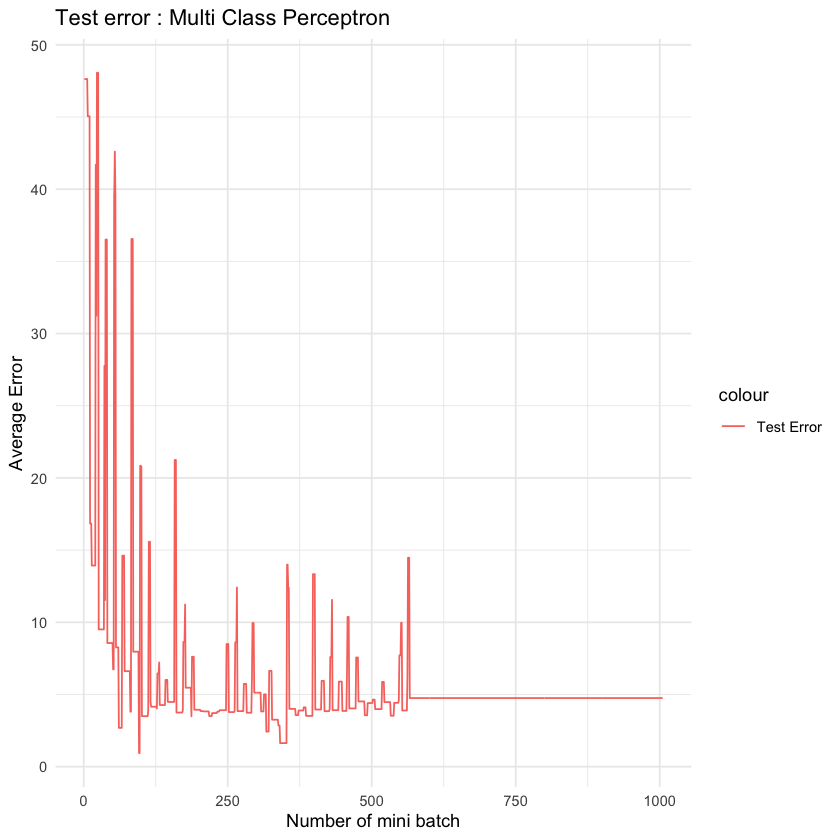

In [7]:
ggplot(data=test_error,aes(x = iteration))+geom_line(aes(y = error,color = "Test Error")) +
    ggtitle('Test error : Multi Class Perceptron') + theme_minimal() + ylab("Average Error") + xlab("Number of mini batch")


From the graph above we clearly see the trend that the test error decreases as the number of theta updates decreases. Since, the perceptron may misclassify other datapoints while updating the theta value using one data point, the graph is very uneven towards the left.

Towards the right hand side of the graph we can see that after certain number of iterations, the error rate becomes constant as updating theta values using one data point may reduce the error for that particular data point but on the same hand increases the error for some other data point that was previously classified correctly. Behind the scene the theta value is changing even if the error value is constant.